In [137]:
import pandas as pd
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import playerdashboardbyyearoveryear
from nba_api.stats.endpoints import commonteamroster
from nba_api.stats.endpoints import playergamelogs
from nba_api.stats.static import players
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
career = playercareerstats.PlayerCareerStats(player_id="203076")
career.get_data_frames()[0]

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203076,2012-13,00,1610612740,NOH,20.0,64,60,1846.0,349,...,0.751,165,357,522,63,75,112,89,158,867
1,203076,2013-14,00,1610612740,NOP,21.0,67,66,2358.0,522,...,0.791,207,466,673,105,89,189,109,200,1394
2,203076,2014-15,00,1610612740,NOP,22.0,68,68,2455.0,642,...,0.805,173,523,696,149,100,200,95,141,1656
3,203076,2015-16,00,1610612740,NOP,23.0,61,61,2164.0,560,...,0.758,130,497,627,116,78,125,121,148,1481
4,203076,2016-17,00,1610612740,NOP,24.0,75,75,2708.0,770,...,0.802,172,712,884,157,94,167,181,168,2099
5,203076,2017-18,00,1610612740,NOP,25.0,75,75,2727.0,780,...,0.828,187,644,831,174,115,193,162,159,2110
6,203076,2018-19,00,1610612740,NOP,26.0,56,56,1850.0,530,...,0.794,174,498,672,218,88,135,112,132,1452
7,203076,2019-20,00,1610612747,LAL,27.0,62,62,2131.0,551,...,0.846,142,435,577,200,91,143,154,156,1618
8,203076,2020-21,00,1610612747,LAL,28.0,36,36,1162.0,301,...,0.738,62,224,286,110,45,59,74,60,786
9,203076,2021-22,00,1610612747,LAL,29.0,40,40,1404.0,370,...,0.713,106,288,394,122,49,90,82,97,927


In [62]:
# get_teams returns a list of 30 dictionaries, each an NBA team.
nba_teams = teams.get_teams()
print("Number of teams fetched: {}".format(len(nba_teams)))
mavs = [team for team in nba_teams if team["full_name"] == "Dallas Mavericks"][0]
mavs

Number of teams fetched: 30


{'id': 1610612742,
 'full_name': 'Dallas Mavericks',
 'abbreviation': 'DAL',
 'nickname': 'Mavericks',
 'city': 'Dallas',
 'state': 'Texas',
 'year_founded': 1980}

In [80]:
nets = [team for team in nba_teams if team["full_name"] == "Brooklyn Nets"][0]
nets

{'id': 1610612751,
 'full_name': 'Brooklyn Nets',
 'abbreviation': 'BKN',
 'nickname': 'Nets',
 'city': 'Brooklyn',
 'state': 'New York',
 'year_founded': 1976}

In [15]:
roster = commonteamroster.CommonTeamRoster(season=2018, team_id=1610612737)
roster.get_data_frames()[0]

,TeamID,SEASON,LeagueID,PLAYER,NICKNAME,PLAYER_SLUG,NUM,POSITION,HEIGHT,WEIGHT,BIRTH_DATE,AGE,EXP,SCHOOL,PLAYER_ID,HOW_ACQUIRED
0,1610612737,2018,00,Justin Anderson,Justin,justin-anderson,1,G-F,6-6,230,"NOV 19, 1993",25.0,3,Virginia,1626147,None
1,1610612737,2018,00,Kevin Huerter,Kevin,kevin-huerter,3,G,6-7,190,"AUG 27, 1998",20.0,R,Maryland,1628989,None
2,1610612737,2018,00,Omari Spellman,Omari,omari-spellman,6,F,6-9,245,"JUL 21, 1997",21.0,R,Villanova,1629016,None
3,1610612737,2018,00,Isaac Humphries,Isaac,isaac-humphries,8,C,7-0,260,"JAN 05, 1998",21.0,R,Kentucky,1629353,None
4,1610612737,2018,00,Jaylen Adams,Jaylen,jaylen-adams,10,G,6-2,190,"MAY 04, 1996",23.0,R,St. Bonaventure,1629121,None
5,1610612737,2018,00,Trae Young,Trae,trae-young,11,G,6-2,180,"SEP 19, 1998",20.0,R,Oklahoma,1629027,Draft Rights Traded from DAL on 06/21/18
6,1610612737,2018,00,Taurean Prince,Taurean,taurean-prince,12,F,6-8,220,"MAR 22, 1994",25.0,2,Baylor,1627752,None
7,1610612737,2018,00,Dewayne Dedmon,Dewayne,dewayne-dedmon,14,C,7-0,245,"AUG 12, 1989",29.0,5,USC,203473,None
8,1610612737,2018,00,Vince Carter,Vince,vince-carter,15,F-G,6-6,220,"JAN 26, 1977",42.0,20,North Carolina,1713,None
9,1610612737,2018,00,Miles Plumlee,Miles,miles-plumlee,18,C,6-11,249,"SEP 01, 1988",30.0,6,Duke,203101,None


In [63]:
player_info = players.find_players_by_first_name("Kyrie")
player_info
#Luka is 1629029
#Kyrie is 202681

[{'id': 202681,
  'full_name': 'Kyrie Irving',
  'first_name': 'Kyrie',
  'last_name': 'Irving',
  'is_active': True}]

In [66]:
luka_career_stats = playercareerstats.PlayerCareerStats(player_id="1629029")
dict_response = luka_career_stats.get_normalized_dict()
player_career_regular_season_totals = dict_response['CareerTotalsRegularSeason']
player_career_regular_season_totals

[{'PLAYER_ID': 1629029,
  'LEAGUE_ID': '00',
  'Team_ID': 0,
  'GP': 400,
  'GS': 400,
  'MIN': 13943.0,
  'FGM': 3898,
  'FGA': 8296,
  'FG_PCT': 0.469864,
  'FG3M': 1201,
  'FG3A': 3457,
  'FG3_PCT': 0.347411,
  'FTM': 2473,
  'FTA': 3309,
  'FT_PCT': 0.747355,
  'OREB': 387,
  'DREB': 3085,
  'REB': 3472,
  'AST': 3317,
  'STL': 467,
  'BLK': 182,
  'TOV': 1598,
  'PF': 902,
  'PTS': 11470}]

In [65]:
kyrie_career_stats = playercareerstats.PlayerCareerStats(player_id="202681")
dict_response = kyrie_career_stats.get_normalized_dict()
player_career_regular_season_totals = dict_response['CareerTotalsRegularSeason']
player_career_regular_season_totals

[{'PLAYER_ID': 202681,
  'LEAGUE_ID': '00',
  'Team_ID': 0,
  'GP': 729,
  'GS': 729,
  'MIN': 25075.0,
  'FGM': 6340,
  'FGA': 13368,
  'FG_PCT': 0.474266,
  'FG3M': 1732,
  'FG3A': 4404,
  'FG3_PCT': 0.393278,
  'FTM': 2787,
  'FTA': 3146,
  'FT_PCT': 0.885886,
  'OREB': 578,
  'DREB': 2355,
  'REB': 2933,
  'AST': 4134,
  'STL': 956,
  'BLK': 314,
  'TOV': 1831,
  'PF': 1669,
  'PTS': 17199}]

In [123]:
kyrie_game_log = playergamelogs.PlayerGameLogs(player_id_nullable="202681", team_id_nullable= "1610612751", season_nullable="2022-23", season_type_nullable="Regular Season")
kyrie_bkn_22 = pd.DataFrame(data=kyrie_game_log.get_data_frames()[0])
kyrie_bkn_22

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG
0,2022-23,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022200772,2023-02-01T00:00:00,BKN @ BOS,...,17,7,25,31,40,35,4,1,35,1
1,2022-23,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022200757,2023-01-30T00:00:00,BKN vs. LAL,...,1,29,4,25,13,10,4,1,12,1
2,2022-23,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022200742,2023-01-28T00:00:00,BKN vs. NYK,...,1,29,22,10,7,8,4,1,7,1
3,2022-23,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022200731,2023-01-26T00:00:00,BKN vs. DET,...,17,7,10,2,29,6,4,1,3,1
4,2022-23,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022200721,2023-01-25T00:00:00,BKN @ PHI,...,39,7,10,13,30,11,1,1,12,1
5,2022-23,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022200704,2023-01-22T00:00:00,BKN @ GSW,...,1,29,2,4,3,7,4,1,5,1
6,2022-23,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022200689,2023-01-20T00:00:00,BKN @ UTA,...,1,17,4,1,2,1,1,1,1,1
7,2022-23,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022200681,2023-01-19T00:00:00,BKN @ PHX,...,17,29,4,13,26,3,4,1,6,1
8,2022-23,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022200651,2023-01-15T00:00:00,BKN vs. OKC,...,17,7,25,37,20,33,4,1,34,1
9,2022-23,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022200627,2023-01-12T00:00:00,BKN vs. BOS,...,32,29,14,27,35,27,4,1,26,1


In [122]:
kyrie_game_log = playergamelogs.PlayerGameLogs(player_id_nullable="202681", season_nullable="2021-22", season_type_nullable="Regular Season")
kyrie_bkn_21 = pd.DataFrame(data=kyrie_game_log.get_data_frames()[0])
kyrie_bkn_21

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG
0,2021-22,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022101216,2022-04-10T00:00:00,BKN vs. IND,...,1,4,12,6,16,8,3,1,8,1
1,2021-22,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022101205,2022-04-08T00:00:00,BKN vs. CLE,...,1,24,18,24,11,18,3,1,20,1
2,2021-22,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022101191,2022-04-06T00:00:00,BKN @ NYK,...,14,11,12,17,5,9,3,1,9,1
3,2021-22,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022101180,2022-04-05T00:00:00,BKN vs. HOU,...,22,4,5,4,3,4,3,1,3,1
4,2021-22,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022101163,2022-04-02T00:00:00,BKN @ ATL,...,1,28,18,8,24,15,3,1,9,1
5,2021-22,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022101148,2022-03-31T00:00:00,BKN vs. MIL,...,14,4,18,16,20,20,3,1,17,1
6,2021-22,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022101133,2022-03-29T00:00:00,BKN vs. DET,...,1,24,5,17,13,26,3,1,23,1
7,2021-22,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022101120,2022-03-27T00:00:00,BKN vs. CHA,...,14,4,12,25,26,21,1,1,24,1
8,2021-22,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022101111,2022-03-26T00:00:00,BKN @ MIA,...,22,4,24,28,4,25,3,1,27,1
9,2021-22,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022101089,2022-03-23T00:00:00,BKN @ MEM,...,22,28,8,3,21,3,3,1,4,1


In [133]:
print(type(kyrie_bkn_22))
print(type(kyrie_bkn_21))
kyrie_nets = pd.concat([kyrie_bkn_21, kyrie_bkn_22])
kyrie_nets

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG
0,2021-22,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022101216,2022-04-10T00:00:00,BKN vs. IND,...,1,4,12,6,16,8,3,1,8,1
1,2021-22,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022101205,2022-04-08T00:00:00,BKN vs. CLE,...,1,24,18,24,11,18,3,1,20,1
2,2021-22,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022101191,2022-04-06T00:00:00,BKN @ NYK,...,14,11,12,17,5,9,3,1,9,1
3,2021-22,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022101180,2022-04-05T00:00:00,BKN vs. HOU,...,22,4,5,4,3,4,3,1,3,1
4,2021-22,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022101163,2022-04-02T00:00:00,BKN @ ATL,...,1,28,18,8,24,15,3,1,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2022-23,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022200066,2022-10-27T00:00:00,BKN vs. DAL,...,32,17,14,3,27,2,4,1,2,1
36,2022-23,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022200060,2022-10-26T00:00:00,BKN @ MIL,...,39,29,2,21,31,24,4,1,26,1
37,2022-23,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022200049,2022-10-24T00:00:00,BKN @ MEM,...,17,17,1,6,31,5,4,1,4,1
38,2022-23,202681,Kyrie Irving,Kyrie,1610612751,BKN,Brooklyn Nets,0022200021,2022-10-21T00:00:00,BKN vs. TOR,...,32,29,14,13,3,18,4,1,17,1


In [127]:
kyrie_game_log = playergamelogs.PlayerGameLogs(player_id_nullable="202681", season_nullable="2022-23", team_id_nullable="1610612742", season_type_nullable="Regular Season")
kyrie_mavs_22 = pd.DataFrame(data=kyrie_game_log.get_data_frames()[0])
kyrie_mavs_22

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG
0,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201195,2023-04-05T00:00:00,DAL vs. SAC,...,1,8,16,6,6,7,3,1,6,1
1,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201167,2023-04-02T00:00:00,DAL @ ATL,...,7,8,6,1,16,1,3,1,2,1
2,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201161,2023-04-01T00:00:00,DAL @ MIA,...,1,8,16,13,11,17,3,1,17,1
3,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201139,2023-03-29T00:00:00,DAL @ PHI,...,7,2,9,13,14,11,3,1,11,1
4,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201123,2023-03-27T00:00:00,DAL @ IND,...,7,3,16,19,2,10,3,1,16,1
5,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201113,2023-03-26T00:00:00,DAL @ CHA,...,7,8,6,17,19,20,3,1,20,1
6,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201101,2023-03-24T00:00:00,DAL vs. CHA,...,7,1,6,17,20,9,3,1,14,1
7,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201075,2023-03-20T00:00:00,DAL @ MEM,...,1,3,16,8,18,15,3,1,13,1
8,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201054,2023-03-17T00:00:00,DAL @ LAL,...,17,19,5,3,4,5,3,1,4,1
9,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022200988,2023-03-08T00:00:00,DAL @ NOP,...,17,8,9,10,13,14,3,1,9,1


In [128]:
kyrie_game_log = playergamelogs.PlayerGameLogs(player_id_nullable="202681", season_nullable="2023-24", season_type_nullable="Regular Season")
kyrie_mavs_23 = pd.DataFrame(data=kyrie_game_log.get_data_frames()[0])
kyrie_mavs_23

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG
0,2023-24,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022301161,2024-04-10T00:00:00,DAL @ MIA,...,28,24,21,30,21,36,6,1,32,1
1,2023-24,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022301144,2024-04-09T00:00:00,DAL @ CHA,...,28,39,33,48,6,10,6,1,17,1
2,2023-24,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022301131,2024-04-07T00:00:00,DAL vs. HOU,...,57,6,1,1,7,7,6,1,3,1
3,2023-24,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022301097,2024-04-05T00:00:00,DAL vs. GSW,...,1,39,7,25,34,15,6,1,14,1
4,2023-24,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022301124,2024-04-04T00:00:00,DAL vs. ATL,...,1,6,33,25,27,49,6,1,42,1
5,2023-24,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022300589,2024-04-02T00:00:00,DAL @ GSW,...,1,39,21,21,29,37,6,1,30,1
6,2023-24,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022301083,2024-03-31T00:00:00,DAL @ HOU,...,28,39,33,32,17,33,6,1,34,1
7,2023-24,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022301073,2024-03-29T00:00:00,DAL @ SAC,...,1,6,13,12,25,44,6,1,40,1
8,2023-24,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022301047,2024-03-26T00:00:00,DAL @ SAC,...,1,55,53,32,3,24,6,1,25,1
9,2023-24,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022301041,2024-03-25T00:00:00,DAL @ UTA,...,1,24,13,21,22,42,6,1,38,1


In [131]:
print(type(kyrie_mavs_22))
print(type(kyrie_mavs_23))
kyrie_mavs = pd.concat([kyrie_mavs_22, kyrie_mavs_23])
kyrie_mavs

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG
0,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201195,2023-04-05T00:00:00,DAL vs. SAC,...,1,8,16,6,6,7,3,1,6,1
1,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201167,2023-04-02T00:00:00,DAL @ ATL,...,7,8,6,1,16,1,3,1,2,1
2,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201161,2023-04-01T00:00:00,DAL @ MIA,...,1,8,16,13,11,17,3,1,17,1
3,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201139,2023-03-29T00:00:00,DAL @ PHI,...,7,2,9,13,14,11,3,1,11,1
4,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201123,2023-03-27T00:00:00,DAL @ IND,...,7,3,16,19,2,10,3,1,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,2023-24,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022300147,2023-11-06T00:00:00,DAL @ ORL,...,1,24,21,45,10,17,1,1,19,1
54,2023-24,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022300143,2023-11-05T00:00:00,DAL vs. CHA,...,1,39,21,48,25,32,1,1,42,1
55,2023-24,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022300006,2023-11-03T00:00:00,DAL @ DEN,...,1,6,21,42,51,20,6,1,25,1
56,2023-24,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022300084,2023-10-27T00:00:00,DAL vs. BKN,...,1,24,21,50,42,45,6,1,49,1


In [140]:
kyrie_mavs.columns

Index(['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2',
       'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK',
       'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK',
       'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK',
       'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK',
       'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK',
       'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK',
       'WNBA_FANTASY_PTS_RANK', 'AVAILABLE_FLAG'],
      dtype='object')

In [213]:
kyrie_mavs['Team'] = 'Mavs'
kyrie_nets['Team'] = 'Nets'
combined_data = pd.concat([kyrie_mavs, kyrie_nets])
combined_data['FG_PCT_m'] = combined_data['FG_PCT'] * 100
combined_data['FG3_PCT_m'] = combined_data['FG3_PCT'] * 100
kyrie_mavs['FG_PCT_m'] = kyrie_mavs['FG_PCT'] * 100
kyrie_mavs['FG3_PCT_m'] = kyrie_mavs['FG3_PCT'] * 100
kyrie_nets['FG_PCT_m'] = kyrie_nets['FG_PCT'] * 100
kyrie_nets['FG3_PCT_m'] = kyrie_nets['FG3_PCT'] * 100


In [174]:
average_mavs_pts = kyrie_mavs['PTS'].mean()
average_nets_pts = kyrie_nets['PTS'].mean()

print(f"Average points for Kyrie with Mavs: {average_mavs_pts}")
print(f"Average points for Kyrie with Nets: {average_nets_pts}")

Average points for Kyrie with Mavs: 25.974358974358974
Average points for Kyrie with Nets: 27.246376811594203


In [241]:
# def boxplot_metrics(metric, description):
#     #Create a box plot
#     plt.figure(figsize=(10, 6))
#     boxplot = sns.boxplot(x='Team', y=metric, data=combined_data)

#     # Calculate medians and outliers
#     mavs_median = kyrie_mavs[metric].median()
#     nets_median = kyrie_nets[metric].median()
#     mavs_outliers = kyrie_mavs[(kyrie_mavs[metric] > kyrie_mavs[metric].quantile(0.75) + 1.5 * (kyrie_mavs[metric].quantile(0.75) - kyrie_mavs[metric].quantile(0.25))) |
#                             (kyrie_mavs[metric] < kyrie_mavs[metric].quantile(0.25) - 1.5 * (kyrie_mavs[metric].quantile(0.75) - kyrie_mavs[metric].quantile(0.25)))]
#     nets_outliers = kyrie_nets[(kyrie_nets[metric] > kyrie_nets[metric].quantile(0.75) + 1.5 * (kyrie_nets[metric].quantile(0.75) - kyrie_nets[metric].quantile(0.25))) |
#                             (kyrie_nets[metric] < kyrie_nets[metric].quantile(0.25) - 1.5 * (kyrie_nets[metric].quantile(0.75) - kyrie_nets[metric].quantile(0.25)))]

#     # Annotate the medians
#     plt.annotate(f'Median: {mavs_median}', xy=(0, mavs_median), xytext=(0.1, mavs_median + 2))
#     plt.annotate(f'Median: {nets_median}', xy=(1, nets_median), xytext=(1.1, nets_median + 2))

#     # Annotate the outliers
#     for outlier in mavs_outliers[metric]:
#         plt.annotate(f'{outlier}', xy=(0, outlier), xytext=(0.05, outlier - 0.5))
#     for outlier in nets_outliers[metric]:
#         plt.annotate(f'{outlier}', xy=(1, outlier), xytext=(1.05, outlier - 0.5))

#     plt.ylabel(description)
#     plt.title(f'Comparison of Kyrie\'s {description} for Mavs and Nets')
#     plt.show()
def boxplot_metrics(ax, metric, description):
    sns.boxplot(x='Team', y=metric, data=combined_data, ax=ax)

    # Calculate medians and outliers
    mavs_median = kyrie_mavs[metric].median()
    nets_median = kyrie_nets[metric].median()
    mavs_outliers = kyrie_mavs[(kyrie_mavs[metric] > kyrie_mavs[metric].quantile(0.75) + 1.5 * (kyrie_mavs[metric].quantile(0.75) - kyrie_mavs[metric].quantile(0.25))) |
                               (kyrie_mavs[metric] < kyrie_mavs[metric].quantile(0.25) - 1.5 * (kyrie_mavs[metric].quantile(0.75) - kyrie_mavs[metric].quantile(0.25)))]
    nets_outliers = kyrie_nets[(kyrie_nets[metric] > kyrie_nets[metric].quantile(0.75) + 1.5 * (kyrie_nets[metric].quantile(0.75) - kyrie_nets[metric].quantile(0.25))) |
                               (kyrie_nets[metric] < kyrie_nets[metric].quantile(0.25) - 1.5 * (kyrie_nets[metric].quantile(0.75) - kyrie_nets[metric].quantile(0.25)))]

    # Annotate the medians
    ax.annotate(f'Median: {mavs_median:.1f}', xy=(0, mavs_median), xytext=(0.25, mavs_median),
                textcoords='offset points', ha='center', va='center')
    ax.annotate(f'Median: {nets_median:.1f}', xy=(1, nets_median), xytext=(0.25, nets_median),
                textcoords='offset points', ha='center', va='center')

    # # Annotate the outliers
    for outlier in mavs_outliers[metric]:
        ax.annotate(f'{outlier:.1f}', xy=(0, outlier), xytext=(5, 0),
                    textcoords='offset points', ha='left', va='center')
    for outlier in nets_outliers[metric]:
        ax.annotate(f'{outlier:.1f}', xy=(1, outlier), xytext=(5, 0),
                    textcoords='offset points', ha='left', va='center')

    ax.set_ylabel(description)
    ax.set_title(f'Comparison of Kyrie\'s {description} for Mavs and Nets')


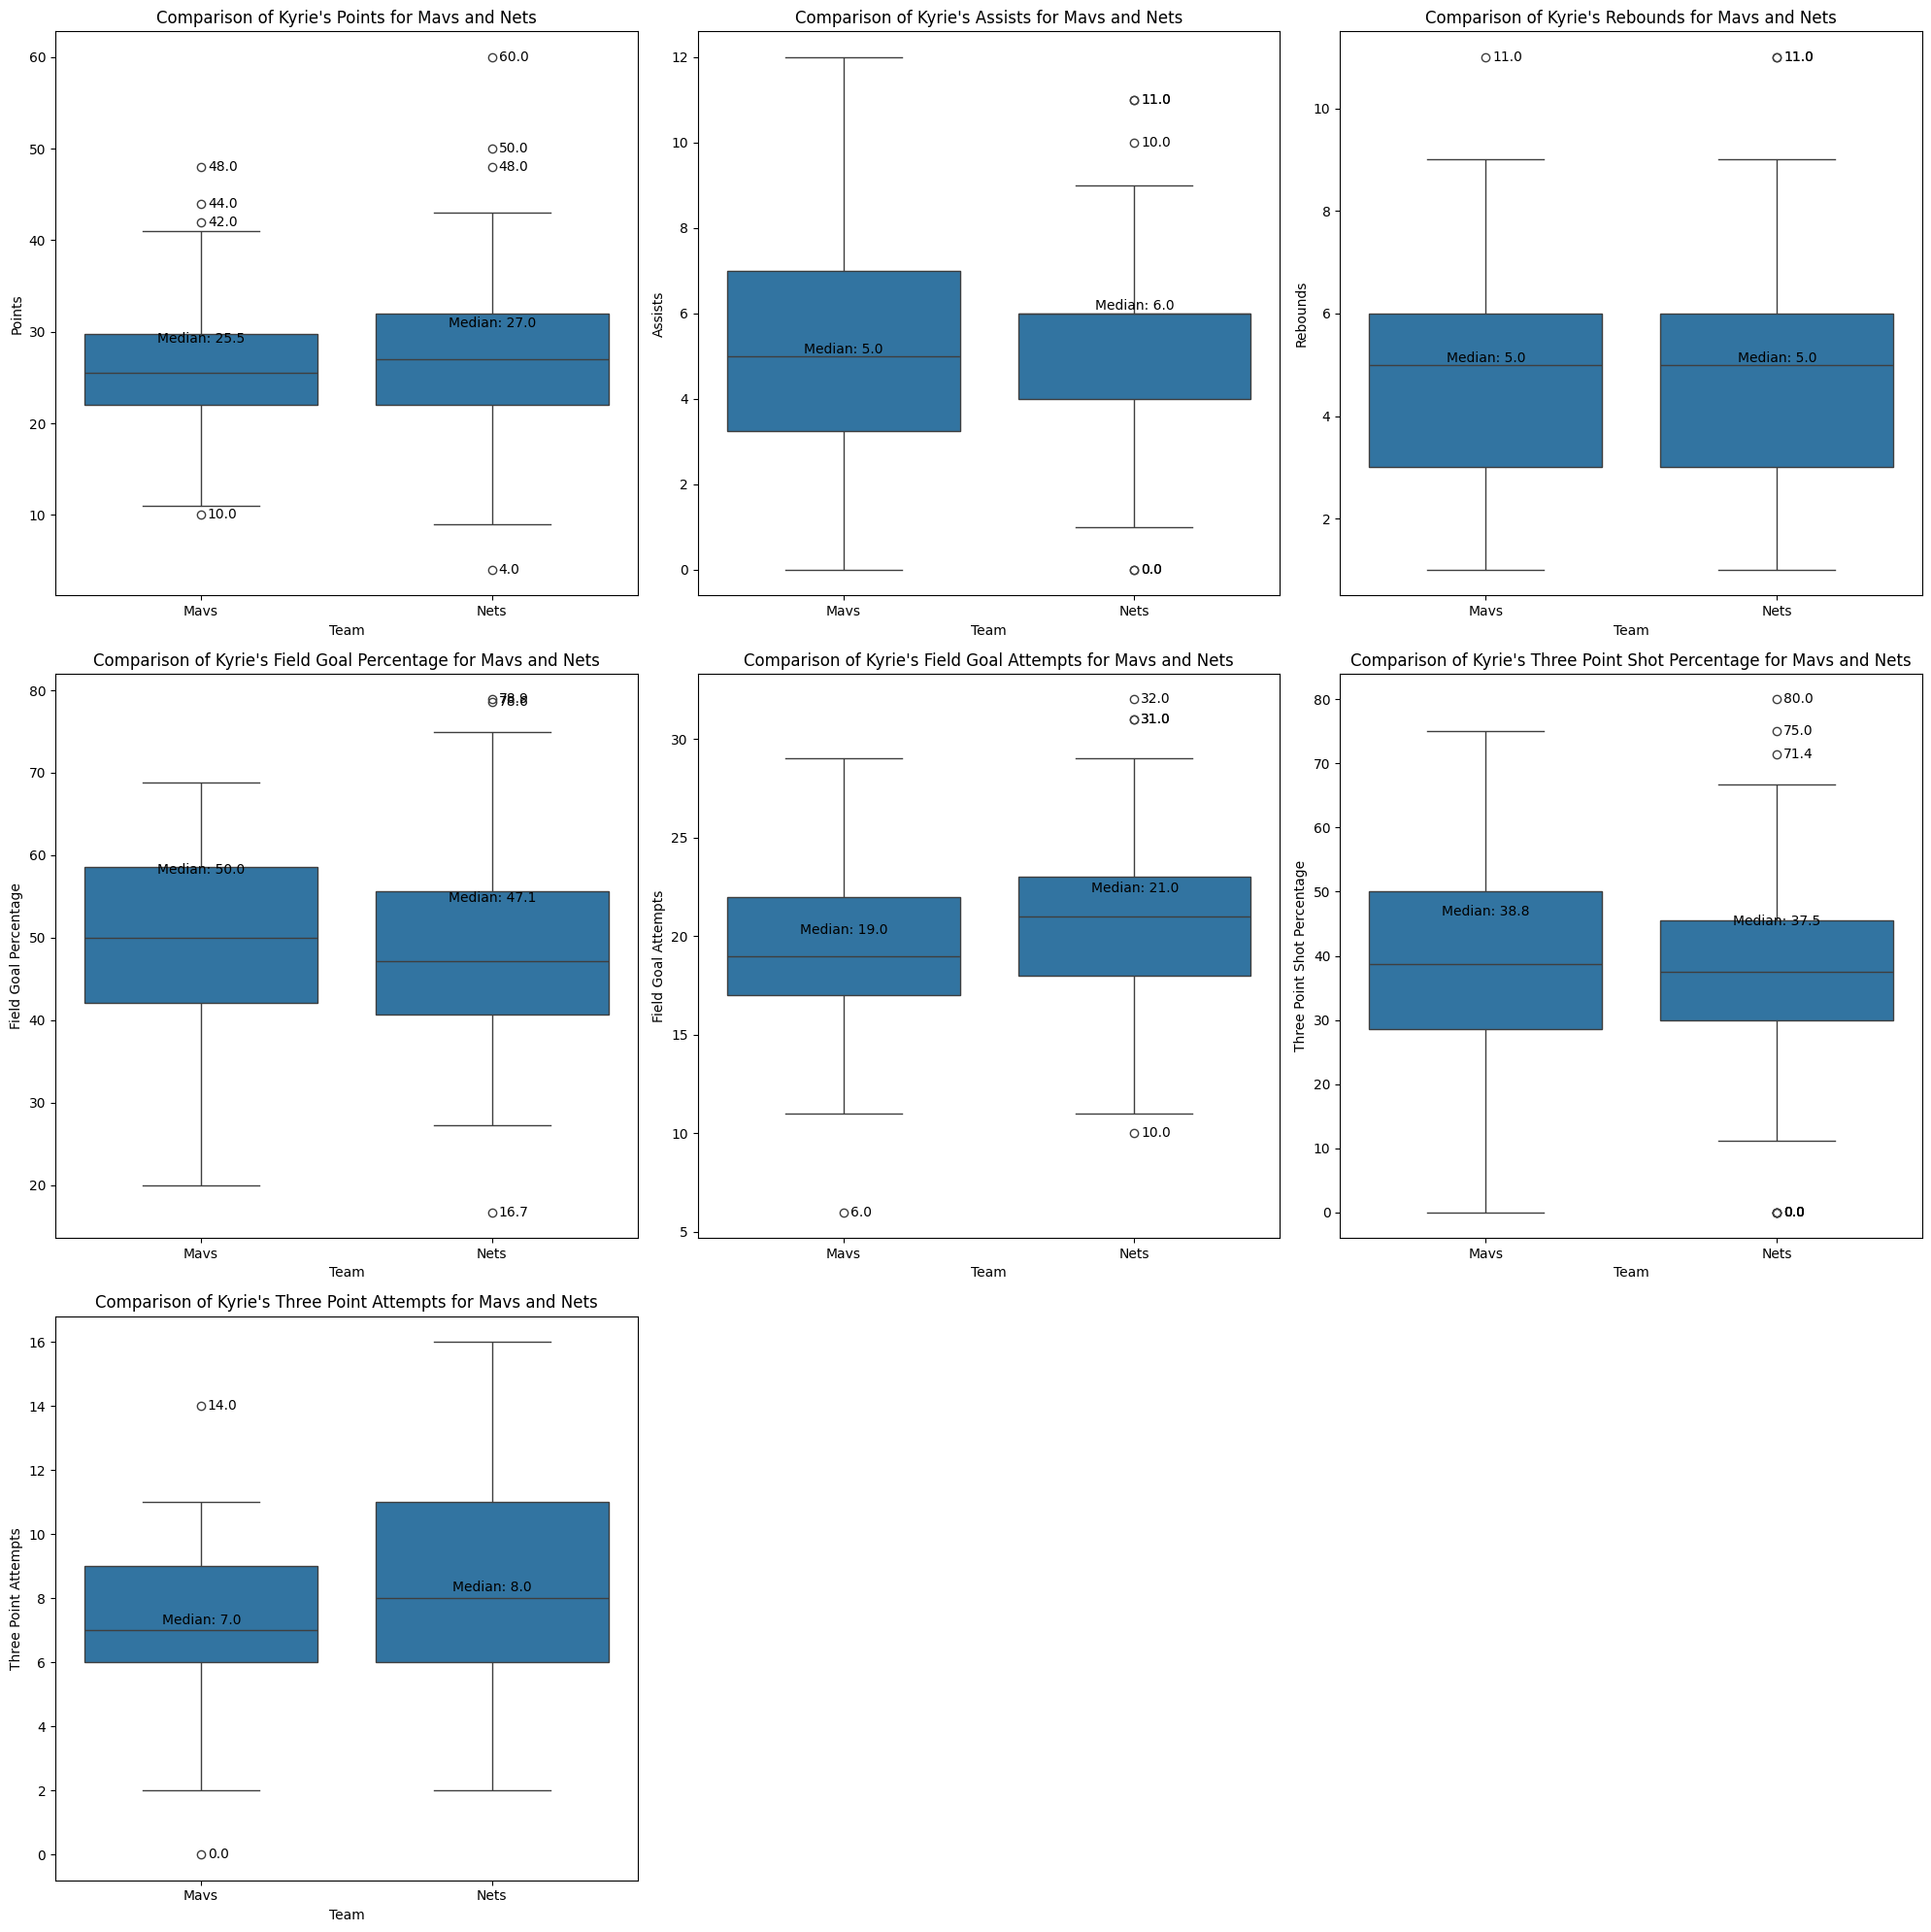

In [242]:
# metric_list = [['PTS', "Points"], ['AST', "Assists"], ['REB', "Rebounds"], ['FG_PCT', "Field Goal Percentage"], ['FGA', "Field Goal Attempts"], ['FG3_PCT', "Three Point Shot Percentage"], ['FG3A', 'Three Point Attempts']]
# for metric, description in metric_list:
#     boxplot_metrics(metric, description)

metric_list = [['PTS', "Points"], ['AST', "Assists"], ['REB', "Rebounds"], 
               ['FG_PCT_m', "Field Goal Percentage"], ['FGA', "Field Goal Attempts"], 
               ['FG3_PCT_m', "Three Point Shot Percentage"], ['FG3A', 'Three Point Attempts']]

# Determine the grid layout
n_metrics = len(metric_list)
n_cols = 3  # Change to 4 if you prefer a 2x4 layout
n_rows = (n_metrics + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each metric in its subplot
for ax, (metric, description) in zip(axes, metric_list):
    boxplot_metrics(ax, metric, description)

# Remove any empty subplots
for ax in axes[len(metric_list):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()